In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

Running some examples of jones_plot() and jones_check()


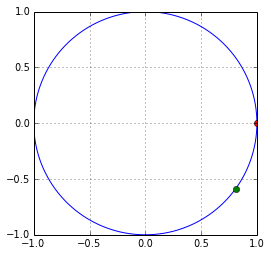

Right Circular polarization


In [2]:
'''
Jones Polarization Vector Plotting and Identification
Alexander Miles - AlexanderAshtonMiles@gmail.com
Date Originated: 9/12/2013
Last Edited    : 9/12/2013 

Written with Python 2.7.3
Requires scipy, matplotlib (pylab), and numpy

These functions use the decreasing phase convention
outlined in Eugene Hecht's Optics, 4th ed.
ISBN: 0805385665. e.g. A monochromatic plane wave
takes the form E = A * exp(+ i* (k*z - omega*t) )
'''

from scipy import pi, linspace, real, exp, arctan
from pylab import plot, axis, grid, show
from numpy import array
from cmath import phase

def jones_plot(jvec, max_phase=2*pi, indicate=True):
    '''
Takes a two-element Jones vector describing electric 
field polarization and plots the trajectory of the
tip of the electric field vector as a function of time.

jones_plot(jvec, max_phase=2*pi, indicate=True)

Parameters
----------
jvec     : A two element iterable containing the x, y
           Jones vector components, in that order.
           The components may be complex valued.
max_phase: The plot spans phases between zero and 
           this value. Default is 2*pi
indicate : If set True, a red dot will indicate the
           phase=0 position, and a green dot will
           indicate the phase=0.1*max_phase. This
           can illustrate left and right circularity.
    '''
    try:
        phi = linspace(0, max_phase, 1001)
        j1, j2 = jvec[0]*exp(-1j*phi), jvec[1]*exp(-1j*phi)
    except:
        print "Input jvec not 2-element iterable"
        return 0

    plot( real( j1 ), real( j2 ) )

    if indicate:
        plot(  real( j1 )[0]  , real( j2 )[0] , 'ro' )
        plot(  real( j1 )[100], real( j2)[100], 'go' )
    axis('image')
    grid()
    show()

def jones_check(jvec, numeric=False):
    '''
Takes a two-element Jones vector describing electric 
field polarization and returns a string describing
the state verbally. Numeric output optional.

jones_check(jvec, numeric=False)

Parameters
----------
jvec     : A two element iterable containing the x, y
           Jones vector components, in that order.
           The components may be complex valued.
numeric  : Boolean. If set True the return will be a
           number corresponding to the state.
           0 = Linear
           1 = Right circular
          -1 = Left circular
           2 = Right elliptical
          -2 = Left elliptical
           
Examples
-------
jones_check([1, -1j]) --> "Right circular polarization"

jones_check([0.5, 0.5]) --> "Linear polarization at 45.000000 degrees CCW from x-axis"

jones_check( array([exp(-1j*pi), exp(-1j*pi/3)]) ) --> Left elliptical polarization, rotated with respect to the axes
    ''' 

    try:
        j1, j2 = jvec
    except:
        print "Input jvec not 2-element iterable"
        return 0
    m1, m2, p1, p2 = abs(j1), abs(j2), phase(j1), phase(j2)
    
    if p1 - p2 == 0 or p1 - pi == pi: 
        ang = arctan(m2/m1)*180./pi #180./pi*phase(p1)
        s = "Linear polarization at %f degrees CCW from x-axis" % ang
    else:
        if m1 == m2:
            if p1 - p2 == pi/2 : 
                s = "Right Circular polarization"
            elif p1 > p2:
                s = "Right elliptical polarization, rotated with respect to the axes"
            if p1 - p2 == -pi/2: 
                s = "Left Circular polarization"
            elif p1 < p2:
                s = "Left elliptical polarization, rotated with respect to the axes"
        else:
            if p1 - p2 == pi/2 : 
                s = "Right elliptical polarization, non-rotated"
            elif p1 > p2:
                s = "Right elliptical polarization, rotated with respect to the axes"
            if p1 - p2 == -pi/2: 
                s = "Left Circular polarization, non-rotated"
            elif p1 < p2:
                s = "Left elliptical polarization, rotated with respect to the axes"
    return s

if __name__ == "__main__":
    print "Running some examples of jones_plot() and jones_check()"
    v = [1, -1j] # This is right circular polarization.
    jones_plot( v )
    print jones_check( v )


In [3]:
def jones2stokes( jvec ):
    try:
        j1, j2 = jvec
        #print j1,j2
    except:
        print "Input jvec not 2-element iterable"
        return 0
    I = abs(j1)**2 + abs(j2)**2
    Q = abs(j1)**2 - abs(j2)**2
    U = 2.0*real((j1 * j2.conjugate() ))
    V = -2.0*imag((j1 * j2.conjugate() ))
    #print I,Q,U,V
    return( [I,Q,U,V] )

In [44]:
jones2stokesV = vectorize( jones2stokes )

In [4]:
LHP = jones2stokes( [ 1 , 0 ] )
LVP = jones2stokes( [ 0 , 1 ] )
LP45 = jones2stokes( [ .7071 ,.7071 ] )
LN45 = jones2stokes( [ .7071 ,-.7071 ] )
LCP = jones2stokes( [ .7071 ,0.7071j ] )
RCP = jones2stokes( [ .7071 ,-0.7071j ] )

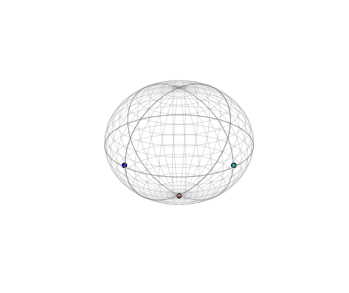

In [12]:
fig = plt.figure(figsize(6,5))
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(6,5)
#ax.invert_zaxis()
#ax.set_frame_on(False)
ax.set_axis_off()
ax.view_init(azim = 45)
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
ax.set_zlim([1.2,-1.2])

#draw circles of latitude
phi = np.linspace(0,   np.pi, 19)
theta = np.linspace(0, 2*np.pi, 38)
 
x = 0.99 * np.outer(np.cos(phi), np.sin(theta))
xt = np.transpose( x )
y = 0.99 * np.outer(np.sin(phi), np.sin(theta))
yt = np.transpose( y )
z = 0.99 * np.outer(np.ones(np.size(phi)), np.cos(theta))
zt = np.transpose( z )

for i in range(len(x)):
    ax.plot( x[i],y[i],z[i], color='gray', alpha=0.2 )
    ax.plot( xt[i],yt[i],zt[i], color='gray', alpha=0.2 )
    ax.plot( xt[i],-yt[i],zt[i], color='gray', alpha=0.2 )
# highlight the grids aligned to the axes
ax.plot( x[0],y[0],z[0], color='gray', alpha=0.5 )
ax.plot( x[9],y[9],z[9], color='gray', alpha=0.5 )
ax.plot( xt[9],yt[9],zt[9], color='gray', alpha=0.5 )
ax.plot( xt[9],-yt[9],zt[9], color='gray', alpha=0.5 )
ax.scatter( LCP[1],LCP[2],LCP[3],c='r',marker='o' )
ax.scatter( LHP[1],LHP[2],LHP[3],c='b',marker='o'  )
ax.scatter( LP45[1],LP45[2],LP45[3],c='c',marker='o'  )
#print ax.get_proj()

In [99]:
invroot2 = 1/sqrt(2.0)

In [30]:
#
# jones matrix for 1/8 wave
M8 = asarray([ [ 1.0, 0.0],[0.0, exp(0.25j*pi)] ], complex)

In [83]:
print M8

[[ 1.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.70710678+0.70710678j]]


In [100]:
LHPjones = asarray([ [1.0], [0.0] ],complex)
LCPjones = asarray([ [invroot2], [invroot2*1j] ],complex)
print LHPjones, LCPjones

[[ 1.+0.j]
 [ 0.+0.j]] [[ 0.70710678+0.j        ]
 [ 0.00000000+0.70710678j]]


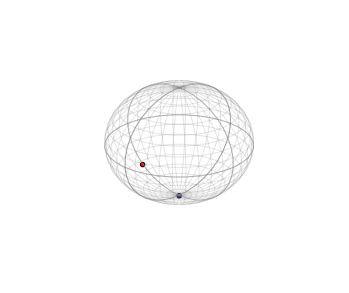

In [101]:
fig = plt.figure(figsize(6,5))
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(6,5)
#ax.invert_zaxis()
#ax.set_frame_on(False)
ax.set_axis_off()
ax.view_init(azim = 45)
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
ax.set_zlim([1.2,-1.2])

#draw circles of latitude
phi = np.linspace(0,   np.pi, 19)
theta = np.linspace(0, 2*np.pi, 38)
 
x = 0.99 * np.outer(np.cos(phi), np.sin(theta))
xt = np.transpose( x )
y = 0.99 * np.outer(np.sin(phi), np.sin(theta))
yt = np.transpose( y )
z = 0.99 * np.outer(np.ones(np.size(phi)), np.cos(theta))
zt = np.transpose( z )

for i in range(len(x)):
    ax.plot( x[i],y[i],z[i], color='gray', alpha=0.2 )
    ax.plot( xt[i],yt[i],zt[i], color='gray', alpha=0.2 )
    ax.plot( xt[i],-yt[i],zt[i], color='gray', alpha=0.2 )
# highlight the grids aligned to the axes
ax.plot( x[0],y[0],z[0], color='gray', alpha=0.5 )
ax.plot( x[9],y[9],z[9], color='gray', alpha=0.5 )
ax.plot( xt[9],yt[9],zt[9], color='gray', alpha=0.5 )
ax.plot( xt[9],-yt[9],zt[9], color='gray', alpha=0.5 )
ax.scatter( LCP[1],LCP[2],LCP[3],c='b' )

stage1outjones = dot(M8,LCPjones)
stage1outstokes = jones2stokes( stage1outjones )

ax.scatter( stage1outstokes[1],stage1outstokes[2],stage1outstokes[3],c='r' )

In [102]:
print stage1outjones

[[ 0.70710678+0.j ]
 [-0.50000000+0.5j]]


In [95]:
print M8

[[ 1.00000000+0.j          0.00000000+0.j        ]
 [ 0.00000000+0.j          0.70710678+0.70710678j]]


In [107]:
print LCPjones

[[ 0.70710678+0.j        ]
 [ 0.00000000+0.70710678j]]


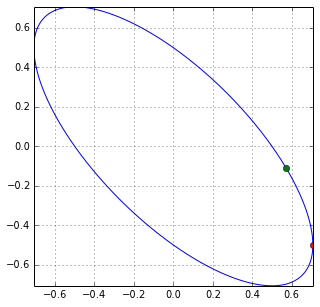

In [104]:
jones_plot(stage1outjones)

In [106]:
jones_check(real(stage1outjones),imag(stage1outjones))

'Left elliptical polarization, rotated with respect to the axes'

In [99]:
def rotated8thWaveplate( phi, jonesVectIn ):
    M8th = asarray([ [ exp(0.125j*pi), 0.0],[0.0, exp(-0.125j*pi)] ], complex)
    sinv = sin(phi)
    cosv = cos(phi)
    X =  asarray( [ [ cosv, -sinv ], [ sinv, cosv ] ], complex) * M8th 
    Y =  X * asarray( [ [ cosv, sinv ], [ -sinv, cosv ] ], complex)  
    Z = dot( Y, jonesVectIn )
    return( Z )

In [39]:
#rot8thwaveplateV = np.vectorize( rotated8thWaveplate , excluded = 'jonesVectIn')

In [95]:
LHPj =  asarray([ [1] ,[ 0] ] ,complex)
LVPj = asarray([ [0] , [1 ]] ,complex)
LP45j = asarray([ [.7071] ,[.7071] ] ,complex)
LN45j = asarray([[ .7071] ,[-.7071] ],complex)
LCPj = asarray([ [.7071] ,[0.7071j] ] ,complex)
RCPj = asarray([ [.7071] ,[-0.7071j] ] ,complex)
print jones2stokes(LHPj)
print jones2stokes(LVPj)
print jones2stokes(LP45j)
print jones2stokes(LN45j)
print jones2stokes(LCPj)
print jones2stokes(RCPj)


[array([ 1.]), array([ 1.]), array([ 0.]), array([-0.])]
[array([ 1.]), array([-1.]), array([ 0.]), array([-0.])]
[array([ 0.99998082]), array([ 0.]), array([ 0.99998082]), array([-0.])]
[array([ 0.99998082]), array([ 0.]), array([-0.99998082]), array([ 0.])]
[array([ 0.99998082]), array([ 0.]), array([ 0.]), array([ 0.99998082])]
[array([ 0.99998082]), array([ 0.]), array([ 0.]), array([-0.99998082])]


In [109]:
# rotate plate and see what happens to the  LHP input
phiSet = linspace( 0.0, 2*pi, 100 )
jonesOut = []
stokesOut = []
for phi in phiSet:
    jonesVecOut = rotated8thWaveplate(  phi,LHPj )
    stokesOut.append( jones2stokes( jonesVecOut ))

In [56]:
print stokesOut[0]

[array([ 1.]), array([ 1.]), array([ 0.]), array([-0.])]


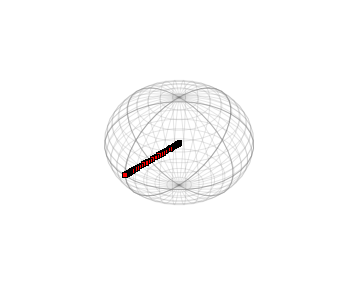

In [111]:
fig = plt.figure(figsize(6,5))
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(6,5)
#ax.invert_zaxis()
#ax.set_frame_on(False)
ax.set_axis_off()
ax.view_init(azim = 45,elev=45)
ax.set_xlim([-1.2,1.2])
ax.set_ylim([-1.2,1.2])
ax.set_zlim([1.2,-1.2])

#draw circles of latitude
phi = np.linspace(0,   np.pi, 19)
theta = np.linspace(0, 2*np.pi, 38)
 
x = 0.99 * np.outer(np.cos(phi), np.sin(theta))
xt = np.transpose( x )
y = 0.99 * np.outer(np.sin(phi), np.sin(theta))
yt = np.transpose( y )
z = 0.99 * np.outer(np.ones(np.size(phi)), np.cos(theta))
zt = np.transpose( z )

for i in range(len(x)):
    ax.plot( x[i],y[i],z[i], color='gray', alpha=0.2 )
    ax.plot( xt[i],yt[i],zt[i], color='gray', alpha=0.2 )
    ax.plot( xt[i],-yt[i],zt[i], color='gray', alpha=0.2 )
# highlight the grids aligned to the axes
ax.plot( x[0],y[0],z[0], color='gray', alpha=0.5 )
ax.plot( x[9],y[9],z[9], color='gray', alpha=0.5 )
ax.plot( xt[9],yt[9],zt[9], color='gray', alpha=0.5 )
ax.plot( xt[9],-yt[9],zt[9], color='gray', alpha=0.5 )
for i in range(len(stokesOut)):
    ax.scatter( stokesOut[i][1],stokesOut[i][2],stokesOut[i][3],c='r',marker=',' )

In [83]:
print transpose(stokesOut)[0][1]

[  0.00000000e+00   1.66533454e-16   0.00000000e+00  -1.66533454e-16
   0.00000000e+00   1.66533454e-16   0.00000000e+00  -1.66533454e-16
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00  -6.93889390e-17   0.00000000e+00  -1.38777878e-17
   0.00000000e+00   6.93889390e-18   3.46944695e-18   0.00000000e+00
   8.67361738e-19  -4.33680869e-19   0.00000000e+00   0.00000000e+00
  -8.47032947e-22  -1.98523347e-23  -6.77626358e-21   0.00000000e+00
  -2.16840434e-19   8.67361738e-19   0.00000000e+00  -3.46944695e-18
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   4.16333634e-17   2.77555756e-17   0.00000000e+00  -5.55111512e-17
   0.00000000e+00   0.00000000e+00   1.11022302e-16   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00  -1.66533454e-16
   0.00000000e+00   1.66533454e-16   1.66533454e-16   0.00000000e+00
  -1.66533454e-16   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

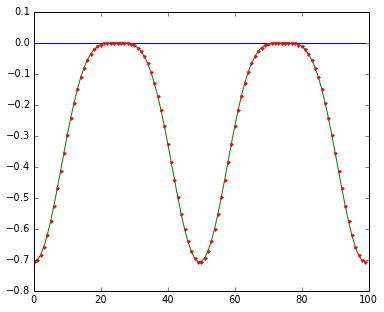

In [108]:
plot( transpose(stokesOut)[0][1] )
plot( transpose(stokesOut)[0][2] )
plot( transpose(stokesOut)[0][3],'.' )

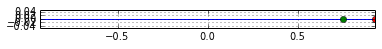

In [104]:
jones_plot(stokesOut[3])

In [106]:
print stokesOut[3]

[array([ 0.92963289]), array([ 0.]), array([-0.65734972]), array([-0.65734972])]


In [107]:
print sqrt(0.65734972**2+ 0.65734972**2)

0.929632889246
